# Netflix Data Analysis
Authors: Alex Arce, Lunden Mandigo, Tyrone Pettygrue 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [3]:
imdb_movies = pd.read_csv('merged_movie_imdb.csv')
box_office = pd.read_csv('enhanced_box_office_data(2000-2024)u.csv')


## Data Collection and Merging
We collected the IMDB movie data from the [IMDB Developer page] (https://developer.imdb.com/non-commercial-datasets/), which provides non-commercial access to a vareity of datasets. For our project, we downloaded "title.basics.tsv.gz" and "title.ratings.tsv.gz". These .tsv files were decompressed using gunzip and loaded into our repository. We quickly realized that these files are way too big to store in GitHub. We merged the files locally on the column "tconst". A full description of columns is written below. After merging, we narrowed our project scope to the years 2001-2025. This decreased the size of the data and allowed us to store the data in GitHub.

We also collected Box Office data from a highly rated [kaggle dataset] (https://www.kaggle.com/datasets/aditya126/movies-box-office-dataset-2000-2024?resource=download). This data provides information related to movie revenue, such as production cost and worldwide earnings.

The IMDB movie data and box office data will be merged on the title of the film, which is represented as a 'primaryTitle' feature in the IMDB data and 'release group' feature in the box office data.



## Data Description

**title.basics**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. '\N' for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

**title.ratings**
- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

**Merged imdb_movies**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. '\N' for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

**enhanced_box_office_data(2000-2024)u**
- Rank - The global ranking of the movie based on worldwide box office revenue.
- Release Group - The title of the movie or film series.
- $Worldwide - Total worldwide box office revenue for the movie
- $Domestic - Total domestic (local) box office revenue.
- Domestic % - Percentage of worldwide revenue generated domestically.
- $Foreign - Total foreign (international) box office revenue.
- Foreign % - Percentage of worldwide revenue generated in foreign markets.
- Year - The release year of the movie.
- Genres - The genres associated with the movie (e.g., Action, Drama, Comedy).
- Rating - Average audience rating from TMDB (e.g., 7.5/10).
- Vote_Count - The number of votes the movie received on TMDB.
- Original_Language - The primary language of the movie.
- Production_Countires - The countries where the movie was produced.


**IMDB Movies**

In [9]:
print(imdb_movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188554 entries, 0 to 188553
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      188554 non-null  int64  
 1   tconst          188554 non-null  object 
 2   titleType       188554 non-null  object 
 3   title           188553 non-null  object 
 4   originalTitle   188553 non-null  object 
 5   isAdult         188554 non-null  int64  
 6   startYear       188554 non-null  int64  
 7   endYear         188554 non-null  object 
 8   runtimeMinutes  188554 non-null  object 
 9   genres          188554 non-null  object 
 10  averageRating   188554 non-null  float64
 11  numVotes        188554 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 17.3+ MB
None


In [7]:
imdb_movies.sample(5)

,Unnamed: 0,tconst,titleType,title,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
707,152527,tt0237289,movie,Count Axel,Grev Axel,0,2001,\N,86,Comedy,5.4,771
105541,998169,tt2458820,movie,"Jack, Jules, Esther & Me","Jack, Jules, Esther & Me",0,2013,\N,106,"Comedy,Drama,Romance",6.4,95
89402,903052,tt2057445,movie,No Other Woman,No Other Woman,0,2011,\N,101,"Drama,Romance,Thriller",6.0,368
157468,1327189,tt5696848,movie,Shivers Down Your Spine,Shivers Down Your Spine,0,2015,\N,135,"Comedy,Crime,Drama",5.6,81
79774,842124,tt1787725,movie,If a Tree Falls: A Story of the Earth Liberati...,If a Tree Falls: A Story of the Earth Liberati...,0,2011,\N,85,"Biography,Crime,Documentary",7.1,3357


In [78]:
# rename columns
imdb_movies.rename(columns={'primaryTitle':'title'}, inplace=True)
box_office.rename(columns={'Release Group':'title'}, inplace=True)

# merge the two dataframes
movies = pd.merge(imdb_movies, box_office, on='title', how='inner')

# remove unnecessary columns (Unnamed: 0, tconst, titleType, endYear, startYear, Genres, Rating, Vote_Count
movies.drop(columns=['Unnamed: 0', 'tconst', 'titleType', 'endYear', 'startYear', 'Genres', 'Rating', 'Vote_Count'], inplace=True)

# Rename columns for usability
movies.rename(columns={'averageRating': 'IMDBavgRating', 'Rank': 'rank', "$Worldwide": 'worldwideGross', "$Domestic": 'domesticGross', 'Domestic %': "domestic%", "$Foreign": 'foreignGross', 'Foreign %': 'foreign%', 'Year': 'year', 'Original_Language': 'originalLang', 'Production_Countries': 'productionCountries'}, inplace=True)

# remove movies from before 2001
movies = movies[movies['year'] >= 2001]

movies.head(5)

,title,originalTitle,isAdult,runtimeMinutes,genres,IMDBavgRating,numVotes,rank,worldwideGross,domesticGross,domestic%,foreignGross,foreign%,year,originalLang,productionCountries
0,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,91304,56,76019048.0,47121859.0,62.0,28897189.0,38.0,2001,en,United States of America
1,The Sorcerer's Apprentice,The Sorcerer's Apprentice,0,86,"Adventure,Family,Fantasy",4.2,757,34,215283742.0,63150991.0,29.3,152132751.0,70.7,2010,en,United States of America
2,Fantastic Four,Fantastic Four,0,106,"Action,Adventure,Fantasy",5.7,353227,11,333535934.0,154696080.0,46.4,178839854.0,53.6,2005,en,"Germany, United States of America"
3,Fantastic Four,Fantastic Four,0,106,"Action,Adventure,Fantasy",5.7,353227,44,167882881.0,56117548.0,33.4,111765333.0,66.6,2015,en,"United Kingdom, Germany, United States of America"
4,Frida,Frida,0,123,"Biography,Drama,Romance",7.3,97408,78,56298474.0,25885000.0,46.0,30413474.0,54.0,2002,en,"Canada, Mexico, United States of America"


In [79]:
movies.columns


Index(['title', 'originalTitle', 'isAdult', 'runtimeMinutes', 'genres',
       'IMDBavgRating', 'numVotes', 'rank', 'worldwideGross', 'domesticGross',
       'domestic%', 'foreignGross', 'foreign%', 'year', 'originalLang',
       'productionCountries'],
      dtype='object')

In [80]:

# There are 36 rows that have a missing value in genre column
movies['genres'].str.contains(r'\\N').value_counts()

# Replace these values with None
movies[movies['genres'].str.contains(r'\\N')]
movies = movies[movies['genres'] != '\\N']
movies.shape


(7004, 16)

In [81]:
# Create new column for main genre
movies['main_genre'] = movies['genres'].str.split(',').str[0]

# Checking if new column is created
movies

,title,originalTitle,isAdult,runtimeMinutes,genres,IMDBavgRating,numVotes,rank,worldwideGross,domesticGross,domestic%,foreignGross,foreign%,year,originalLang,productionCountries,main_genre
0,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,91304,56,7.601905e+07,47121859.0,62.0,28897189.0,38.0,2001,en,United States of America,Comedy
1,The Sorcerer's Apprentice,The Sorcerer's Apprentice,0,86,"Adventure,Family,Fantasy",4.2,757,34,2.152837e+08,63150991.0,29.3,152132751.0,70.7,2010,en,United States of America,Adventure
2,Fantastic Four,Fantastic Four,0,106,"Action,Adventure,Fantasy",5.7,353227,11,3.335359e+08,154696080.0,46.4,178839854.0,53.6,2005,en,"Germany, United States of America",Action
3,Fantastic Four,Fantastic Four,0,106,"Action,Adventure,Fantasy",5.7,353227,44,1.678829e+08,56117548.0,33.4,111765333.0,66.6,2015,en,"United Kingdom, Germany, United States of America",Action
4,Frida,Frida,0,123,"Biography,Drama,Romance",7.3,97408,78,5.629847e+07,25885000.0,46.0,30413474.0,54.0,2002,en,"Canada, Mexico, United States of America",Biography
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7138,Moonage Daydream,Moonage Daydream,0,135,"Biography,Documentary,History",7.6,15578,145,1.309578e+07,4218925.0,32.2,8876856.0,67.8,2022,en,"Germany, United States of America",Biography
7139,Kiss Kiss Bang Bang,Kiss Kiss Bang Bang,0,98,"Crime,Romance,Thriller",3.2,7,191,1.578515e+07,4243756.0,26.9,11541392.0,73.1,2005,en,United States of America,Crime
7140,Aladdin,Aladdin,0,104,"Drama,Musical,Romance",5.1,51,9,1.050694e+09,355559216.0,33.8,695134737.0,66.2,2019,en,United States of America,Drama
7141,Unstoppable,Unstoppable,0,84,Documentary,7.8,23,43,1.678055e+08,81562942.0,48.6,86242524.0,51.4,2010,en,"United Kingdom, United States of America",Documentary


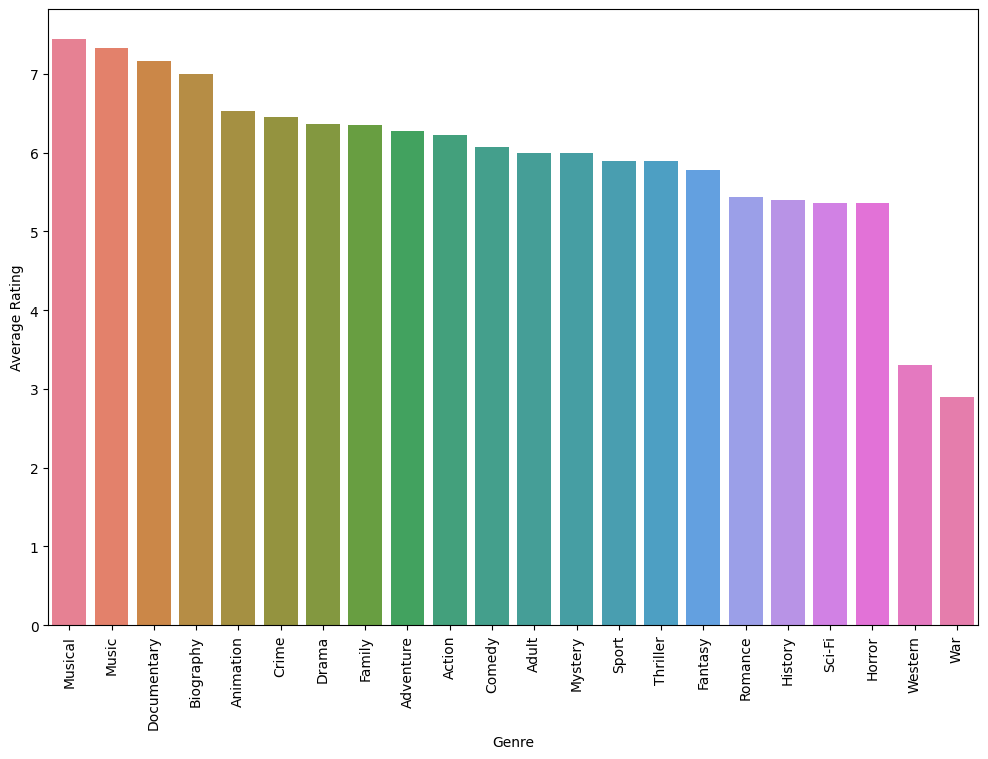

In [82]:
# Need to do a groupby for genre
main_genre_grouped = movies.groupby('main_genre')['IMDBavgRating'].mean().reset_index()



# Sorting rating from highest to lowest
main_genre_grouped = main_genre_grouped.sort_values('IMDBavgRating', ascending=False)

# Creation of visualization for highest rated genres 
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=main_genre_grouped['main_genre'], y=main_genre_grouped['IMDBavgRating'], hue=main_genre_grouped['main_genre'], ax=ax, label='Average Rating by main genre')
ax.set_xlabel("Genre")
ax.set_ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

## Results
- The Genres with the highest average ratings are Musical, Music and Documentaries.
- We filtered the data to find the main genre for each movie in our DataFrame as some films have multiple genres (Romance,Comedy).

### Finding the Top 5 Film that are over the average runtime and over 10,000 votes

In [83]:
# Replacing all 'N' in runtimeMinutes to 0
movies.loc[
    movies['runtimeMinutes'].str.contains('N', na=False), 'runtimeMinutes'
] = 0




# Converting the dtype of runtimeMinutes to int
movies['runtimeMinutes'] = movies['runtimeMinutes'].astype('int')





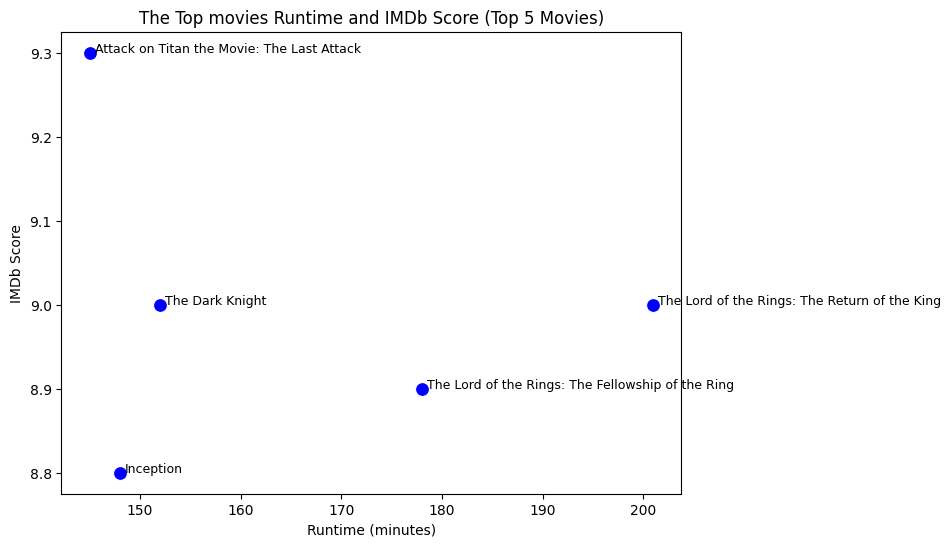

In [84]:
# Filter for the top 5 movies by 'averageRating' and have over 10000 votes and over 120 minutes long
top5_movies = movies[
    (movies['runtimeMinutes'] > 120) &
    (movies['numVotes'] > 10000)
].sort_values('IMDBavgRating', ascending=False).head(5)



plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=top5_movies, x='runtimeMinutes', y='IMDBavgRating', s=100, color='b')

for i in range(top5_movies.shape[0]):
    # Use this line if you have a title column:
    label = top5_movies['title'].iloc[i]

    # Text will display name of film over point
    plt.text(x=top5_movies['runtimeMinutes'].iloc[i] + 0.5,
             y=top5_movies['IMDBavgRating'].iloc[i],
             s=label,
             fontsize=9)

plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.title('The Top movies Runtime and IMDb Score (Top 5 Movies)')
plt.show()

## The Scatter plot displays the Top 5 films that meet our criteria
1. Attack on Titan the Movie: The Last Attack, The Dark Knight, Inception, The Lord of the Rings: The Fellowship of the Ring, and The Lord of the Rings: The Return of the King
2. These movies are some of the highest rating movies with runtimes longer than 2 hours. 

In [85]:
movies[movies['year'] == 2022][movies['genres'].str.contains('Animation')]

,title,originalTitle,isAdult,runtimeMinutes,genres,IMDBavgRating,numVotes,rank,worldwideGross,domesticGross,domestic%,foreignGross,foreign%,year,originalLang,productionCountries,main_genre
2167,Lightyear,Lightyear,0,105,"Action,Adventure,Animation",6.1,129376,19,226425420.0,118307188.0,52.2,108118232.0,47.8,2022,en,United States of America,Action
2168,Strange World,Strange World,0,102,"Action,Adventure,Animation",5.7,48115,53,73621640.0,37968963.0,51.6,35652677.0,48.4,2022,en,United States of America,Action
2236,The Amazing Maurice,The Amazing Maurice,0,93,"Adventure,Animation,Comedy",6.2,6090,105,21131530.0,4303645.0,20.4,16827885.0,79.6,2022,en,"Belgium, Canada, Germany, United Kingdom",Adventure
2857,Chickenhare and the Hamster of Darkness,Hopper et le hamster des ténèbres,0,91,"Adventure,Animation,Comedy",6.3,2708,159,10885116.0,0.0,0.0,10885116.0,100.0,2022,en,"Belgium, France, United States of America",Adventure
2885,Rabbit Academy: Mission Eggpossible,Die Häschenschule - Der große Eierklau,0,76,"Adventure,Animation,Comedy",5.4,347,183,8117612.0,0.0,0.0,8117612.0,100.0,2022,de,"Austria, Germany",Adventure
3187,Doraemon the Movie: Nobita's Little Star Wars ...,Doraemon the Movie: Nobita's Little Star Wars ...,0,108,"Action,Adventure,Animation",6.5,765,96,22044058.0,0.0,0.0,22044058.0,100.0,2022,ja,Japan,Action
3345,Laid-Back Camp Movie,Eiga yurukyan,0,120,"Adventure,Animation,Comedy",7.6,524,195,7317913.0,0.0,0.0,7317913.0,100.0,2022,ja,Japan,Adventure
3413,Dragon Ball Super: Super Hero,Doragon Bôru Sûpâ Sûpâ Hîrô,0,100,"Action,Adventure,Animation",7.1,16630,46,86562140.0,38112140.0,44.0,48450000.0,56.0,2022,ja,Japan,Action
3495,Tad the Lost Explorer and the Emerald Tablet,Tadeo Jones 3. La tabla esmeralda,0,90,"Adventure,Animation,Comedy",6.0,2288,77,32849430.0,67599.0,0.2,32781831.0,99.8,2022,es,Spain,Adventure
3565,The First Slam Dunk,The First Slam Dunk,0,124,"Animation,Comedy,Drama",8.1,10749,32,158302288.0,1291869.0,0.8,157010419.0,99.2,2022,ja,Japan,Animation


### Have the number of movies released per year changed over time?

The number of movies released per year fluctuates greatly from 2000-2024. There is a relative spike in 2015 with around 350 movies released and another local peak during 2022 with around 330 movies released.

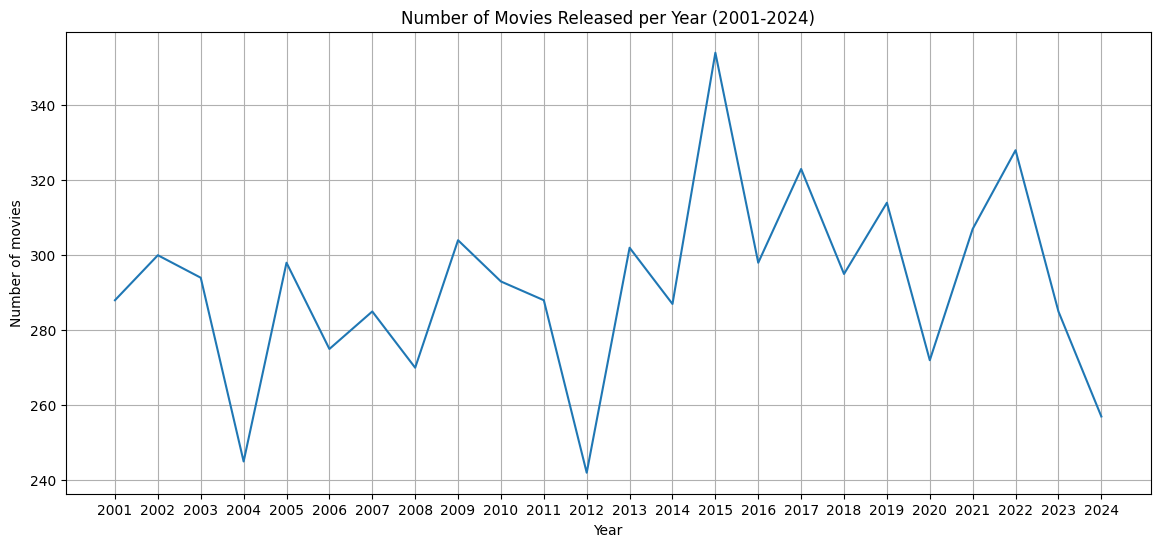

In [86]:
# Count the number of movies per year
movies_per_year = movies['year'].value_counts().sort_index()


# Plot the number of movies per year
plt.figure(figsize=(14, 6))
plt.plot(movies_per_year)
plt.xticks(np.arange(2001, 2025, 1))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of Movies Released per Year (2001-2024)')
plt.grid()
plt.show()

### What is the relationship between number of votes and the rating of the movie?
There are some considerable outliers that are skewing the distribution of the data. Before removing these outliers, there is very little correlation between average rating and number of votes (R^2 = 0.002). Even after removing the outliers, there is no significant correlation between average rating and number of votes.

But what about from the year 2024?
Still nothing

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          IMDBavgRating   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     859.2
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          2.95e-178
Time:                        15:38:20   Log-Likelihood:                -10496.
No. Observations:                7004   AIC:                         2.100e+04
Df Residuals:                    7002   BIC:                         2.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0755      0.014    424.663      0.000       6.047       6.104
numVotes    2.093e-06   7.14e-08     29.313      0.000    1.95e-06    2.23e-06
==============================================================================
Omnibus:                      440.213   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.090
Skew:                          -0.513   Prob(JB):                    3.14e-151
Kurtosis:                       4.149   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

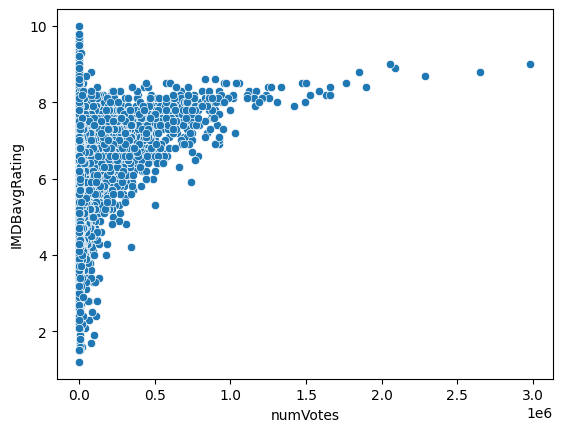

In [88]:
# plot numVote vs averageRating
sns.scatterplot(data=movies,x='numVotes',y='IMDBavgRating')

# create linear model
model0 = smf.ols("IMDBavgRating ~ numVotes", data=movies).fit()
model0.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          IMDBavgRating   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     381.8
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           6.72e-71
Time:                        15:39:05   Log-Likelihood:                -794.66
No. Observations:                 882   AIC:                             1593.
Df Residuals:                     880   BIC:                             1603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5528      0.036    180.916      0.000       6.482       6.624
numVotes    1.303e-06   6.67e-08     19.539      0.000    1.17e-06    1.43e-06
==============================================================================
Omnibus:                       43.977   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.987
Skew:                          -0.500   Prob(JB):                     3.12e-12
Kurtosis:                       3.666   Cond. No.                     9.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

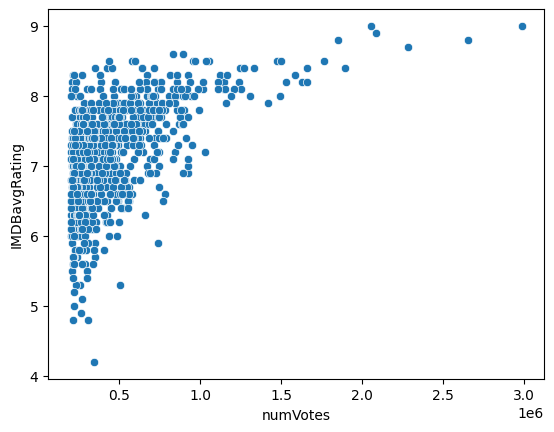

In [89]:
# remove outliers
movies1 = movies[movies['numVotes'] > 200000]
sns.scatterplot(data=movies1,x='numVotes',y='IMDBavgRating')

model1 = smf.ols("IMDBavgRating ~ numVotes", data=movies1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          IMDBavgRating   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     12.03
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           0.000614
Time:                        15:39:42   Log-Likelihood:                -378.76
No. Observations:                 257   AIC:                             761.5
Df Residuals:                     255   BIC:                             768.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2717      0.074     85.083      0.000       6.126       6.417
numVotes    3.139e-06   9.05e-07      3.468      0.001    1.36e-06    4.92e-06
==============================================================================
Omnibus:                       14.549   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.386
Skew:                          -0.468   Prob(JB):                     0.000168
Kurtosis:                       3.864   Cond. No.                     9.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

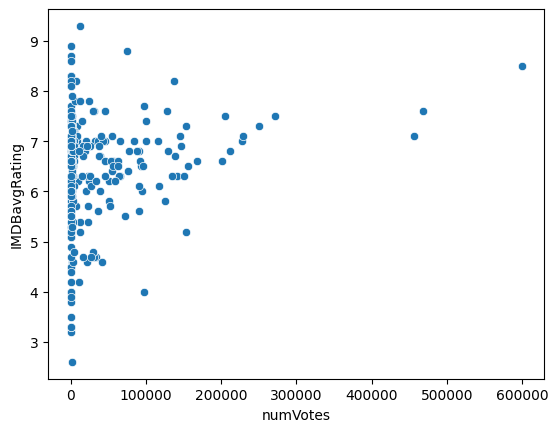

In [91]:
movies_2024 = movies[movies['year'] == 2024]

# plot numVote vs averageRating
sns.scatterplot(data=movies_2024,x='numVotes',y='IMDBavgRating')

# create linear model
model = smf.ols("IMDBavgRating ~ numVotes", data=movies_2024).fit()
model.summary()

### What does the distribution look like for high, medium, and low rated movies? How many votes do each category of movie get?
The number of mediumm rated movies decreased in 2024. During all years there are more medium rated movies than high rated movies. In 2024 the gap decreases significantly. Did directors stop making decent movies? Let's look at the ratings per genre to help us understand.


rating_category  Low  Medium  High
year                              
2001               8     216    64
2002              14     214    72
2003              11     195    88
2004               7     173    65
2005              17     211    70
2006              11     190    74
2007              10     192    83
2008              18     185    67
2009              17     210    77
2010              15     212    66
2011              17     202    69
2012              10     177    55
2013              15     197    90
2014              13     191    83
2015              12     255    87
2016              16     207    75
2017              15     220    88
2018              15     212    68
2019              11     231    72
2020              19     213    40
2021               8     222    77
2022              15     235    78
2023               6     218    61
2024              10     188    59


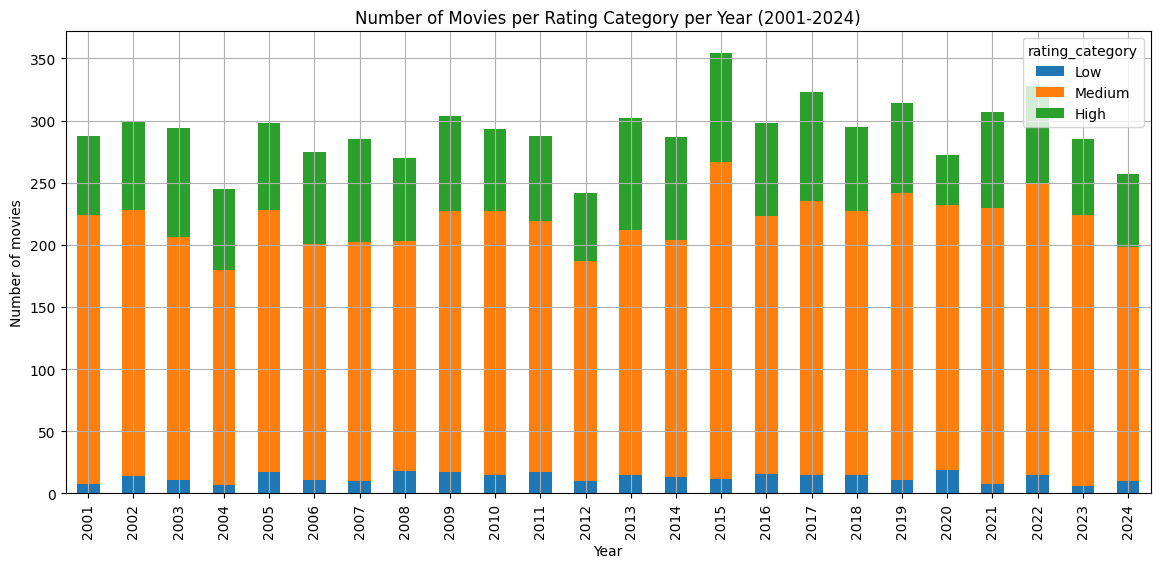

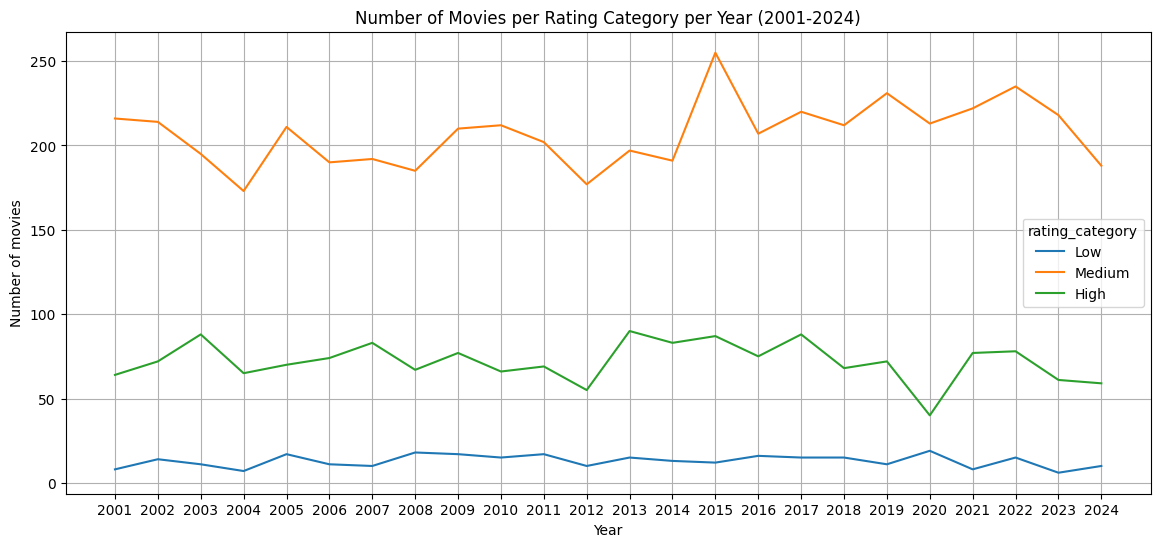

In [95]:
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
movies['rating_category'] = pd.cut(movies['IMDBavgRating'], bins=bins, labels=labels)

# Count the number of movies per rating category per year
movies_per_year = movies.groupby(['year', 'rating_category']).size().unstack().fillna(0)
print(movies_per_year)

# Plot the number of movies per rating category per year
plt.figure(figsize=(14, 6))
movies_per_year.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of Movies per Rating Category per Year (2001-2024)')
plt.grid()
plt.show()

# plot number of movies per rating category as line plot
plt.figure(figsize=(14, 6))
movies_per_year.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.xticks(np.arange(2001, 2025, 1))
plt.ylabel('Number of movies')
plt.title('Number of Movies per Rating Category per Year (2001-2024)')
plt.grid()
plt.show()

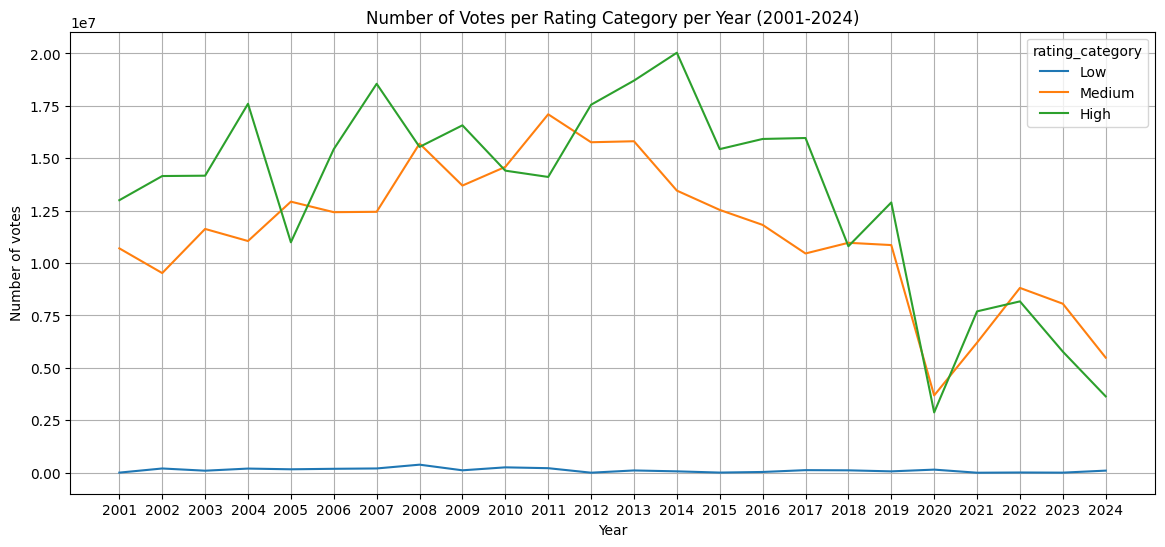

In [94]:
# plot number of votes per rating category as a line plot
votes_per_year = movies.groupby(['year', 'rating_category'])['numVotes'].sum().unstack().fillna(0)
plt.figure(figsize=(14, 6))
votes_per_year.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of votes')
plt.xticks(np.arange(2001, 2025, 1))
plt.title('Number of Votes per Rating Category per Year (2001-2024)')
plt.grid()
plt.show()

In [ ]:
movies.sample(5)

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,Release_Year,endYear,runtimeMinutes,genres,averageRating,numVotes,rating_category
57159,694693,tt14030590,movie,On These Grounds,Spring Valley,0,2021,\N,101,Documentary,6.8,132,Medium
76815,824165,tt1715344,movie,Adam,Quad,0,2020,\N,100,"Biography,Drama",6.5,1550,Medium
109749,1022619,tt2662228,movie,10%: What Makes a Hero?,10%: What Makes a Hero?,0,2013,\N,88,"Adventure,Biography,Documentary",5.4,548,Medium
147262,1259883,tt4660620,movie,The Silenced Walls,La cité muette,0,2015,\N,88,"Documentary,Drama,History",7.0,6,Medium
62799,734706,tt14792898,movie,Mashup at the Movies,Mashup at the Movies,0,2021,\N,73,"Comedy,Horror",4.1,37,Medium


In [ ]:
movies.sort_values(by='numVotes', ascending=False)

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,Release_Year,endYear,runtimeMinutes,genres,averageRating,numVotes,rating_category
17265,258852,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2985446,High
55222,680670,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2653044,High
21987,411359,tt0816692,movie,Interstellar,Interstellar,0,2014,\N,169,"Adventure,Drama,Sci-Fi",8.7,2284961,High
47,92178,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Adventure,Drama,Fantasy",8.9,2086193,High
182,117342,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Adventure,Drama,Fantasy",9.0,2057150,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85991,881491,tt1957939,movie,Kaleb,Kaleb,0,2013,\N,80,"Drama,Family",7.8,5,High
57762,698754,tt14106846,movie,Irodovi sinovi (genocid u NDH),Irodovi sinovi (genocid u NDH),0,2016,\N,\N,Documentary,9.2,5,High
185835,1517632,tt9390042,movie,Co-operatively Yours,Co-operatively Yours,0,2017,\N,57,Documentary,7.0,5,Medium
35323,535092,tt11115272,movie,A Flower from Heaven 3,A Flower from Heaven 3,0,2021,\N,\N,Family,4.6,5,Medium


In [96]:
# Filter movies with more than 200k votes
movies_200k_votes = movies[movies['numVotes'] >= 200000]

In [98]:
# Group by release year and calculate the average rating
average_ratings_per_year = movies_200k_votes.groupby('year')['IMDBavgRating'].mean().reset_index()

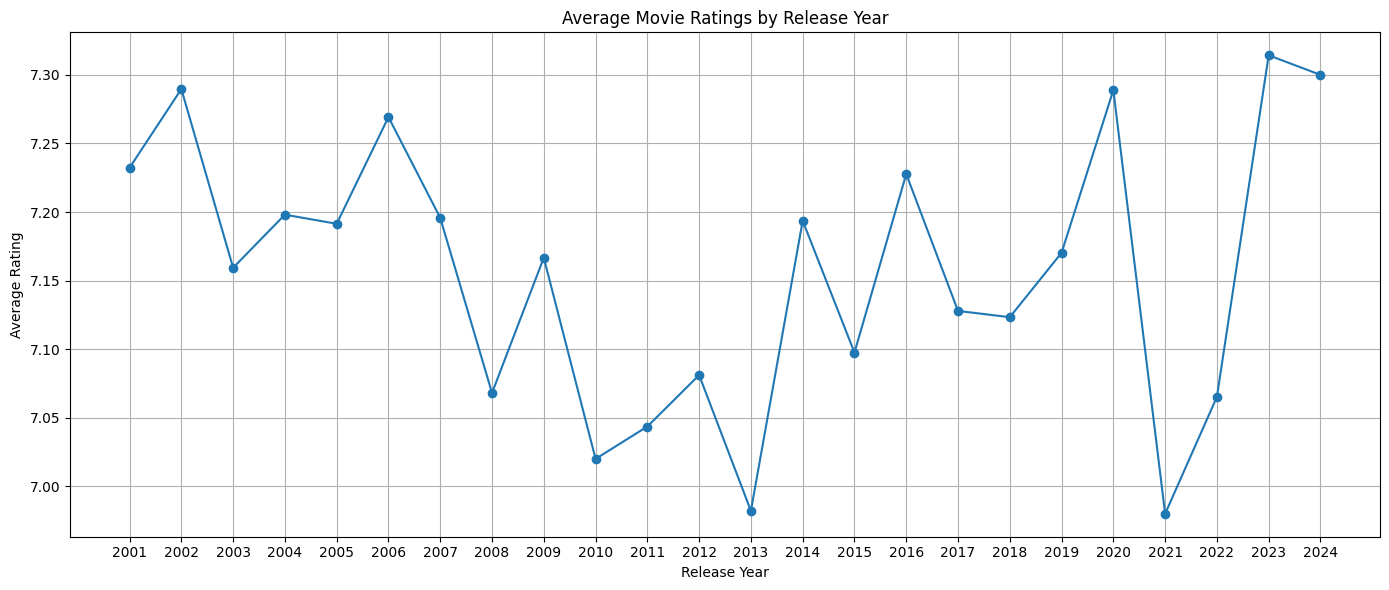

In [100]:
# Plotting the average ratings over the years
plt.figure(figsize=(14, 6))
plt.plot(average_ratings_per_year['year'], average_ratings_per_year['IMDBavgRating'], marker='o')
plt.title('Average Movie Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(average_ratings_per_year['year'])  # Annotate each year on the x-axis
plt.tight_layout()
plt.show()

In [101]:
# Group by genres and split multiple genres into separate rows
df_genres = movies_200k_votes.assign(genres=movies_200k_votes['genres'].str.split(',')).explode('genres')

In [102]:
# Group by genre and release year and calculate the average rating
average_ratings_by_genre_year = (df_genres.groupby(['genres', 'year'])['IMDBavgRating'].mean().reset_index())

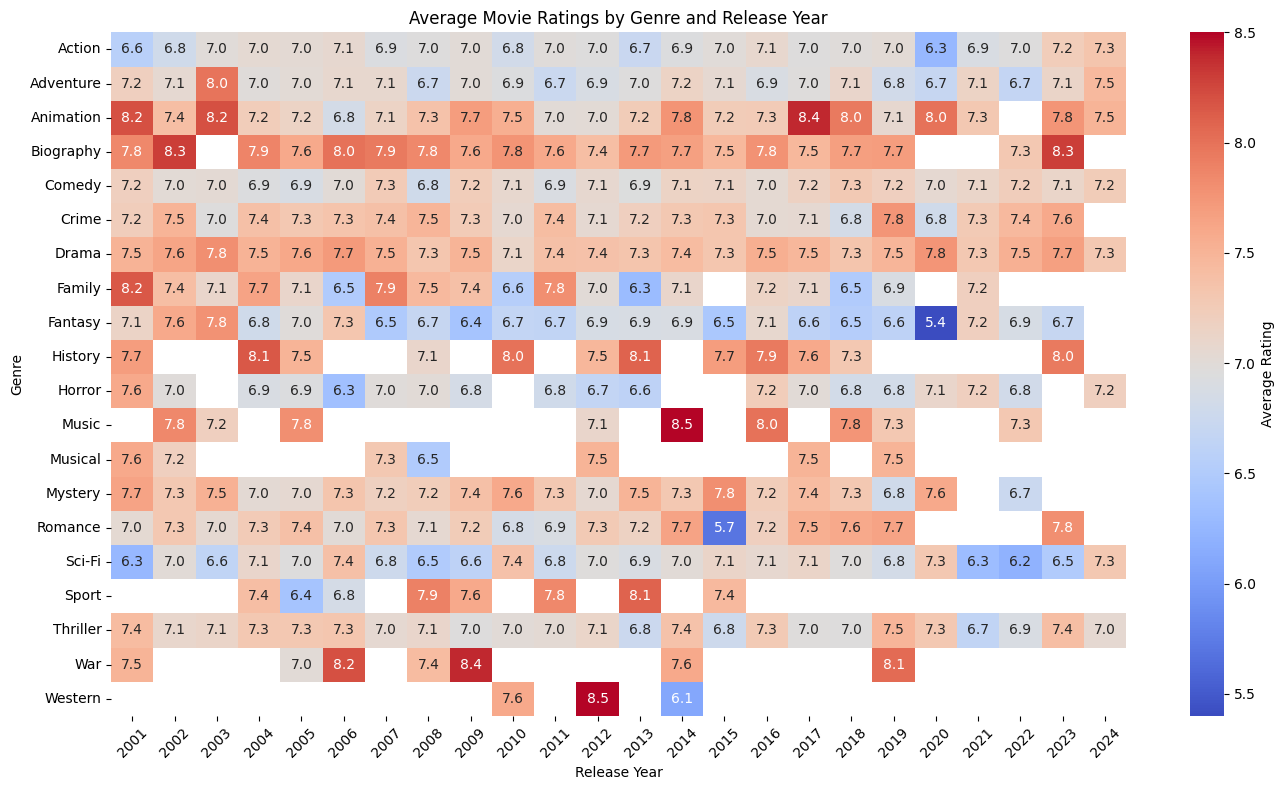

In [103]:
# Pivot the data for heatmap
heatmap_data = average_ratings_by_genre_year.pivot(index='genres', columns='year', values='IMDBavgRating')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average Rating'})
plt.title('Average Movie Ratings by Genre and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.xticks(rotation=45)  # Rotate x-axis for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()